In [2]:
using Distributions
using Plots
pyplot()

Plots.PyPlotBackend()

In [25]:
f  = invlogcdf(Normal(),log(0.005)) 
nf = invlogcdf(Normal(),log(0.995))

f_interval = (5/sqrt(100))*f + 101
nf_interval = (5/sqrt(100))*nf + 101

print(f_interval,"      ",nf_interval)

99.71208534822556      102.28791465177444

In [241]:
N = 18
n=0

f = Int.(rand(N).<0.95)

for i=1:N
    if f[i] == 1
        n += 1 
    end
end
dp= 0.01
p = collect(0.0:dp:1.0)

prior_uniform = fit(Uniform,p)
prior_gauss = fit(Normal,p)

L = binomial(N,n)*(p.^n).*((1 .-p).^(N-n))

post_uniform = L.*pdf.(prior_uniform,p)
post_uniform = post_uniform/(sum(post_uniform)*dp)

post_gauss = L.*pdf.(prior_gauss,p)
post_gauss = post_gauss/(sum(post_gauss)*dp)
show()

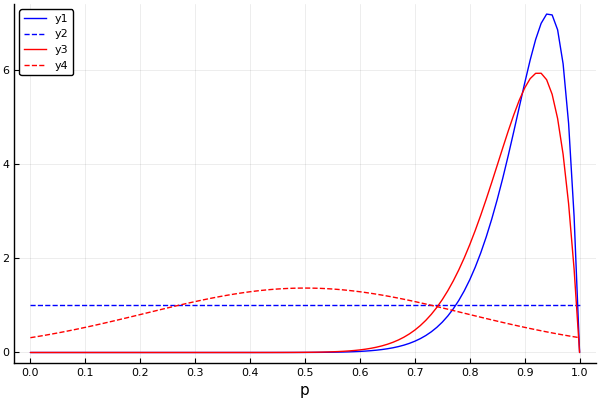

In [242]:
plot(p,post_uniform,color=:blue)
plot!(p,pdf.(prior_uniform,p),color=:blue,line=:dash)
plot!(p,post_gauss,color=:red)
plot!(p,pdf.(prior_gauss,p),color=:red,line=:dash)
xticks!(0:0.1:1)
xlabel!("p")

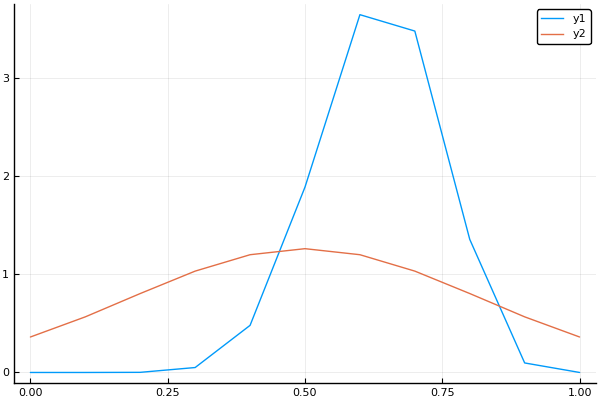

In [174]:
plot(p,post_gauss)
plot!(p,pdf.(prior_gauss,p))